In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
tin = pd.read_excel('sn.xlsx')

In [3]:
tin

,Volume (A^3),Volume/Atom,Pressure (GPa),Volume Uncertainty (Per atom),Pressure Uncertainty (Gpa),Phase
0,107.881,26.97025,0.2,0.00750,0.1,amb
1,107.461,26.86525,0.4,0.00750,0.1,amb
2,105.618,26.40450,1.4,0.00750,0.1,amb
3,104.589,26.14725,2.1,0.00750,0.1,amb
4,103.096,25.77400,3.0,0.00750,0.1,amb
5,102.366,25.59150,3.5,0.00625,0.1,amb
6,101.528,25.38200,4.1,0.00625,0.1,amb
7,100.816,25.20400,4.6,0.00625,0.1,amb
8,100.139,25.03475,5.1,0.00625,0.1,amb
9,99.113,24.77825,5.9,0.00625,0.1,amb


In [4]:
vals = tin.values.T
volatom = vals[1]
pressure = vals[2]
vol_var = vals[3]**2
pressure_var = vals[4]**2
phase = vals[5]
vol_sig = vals[3]
pressure_sig = vals[4]

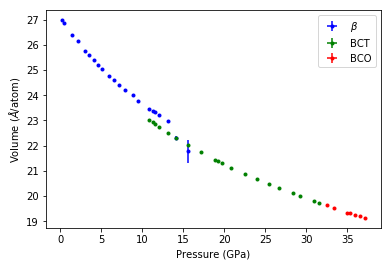

In [5]:
plt.xlabel('Pressure (GPa)')
plt.ylabel(r'Volume ($\AA$/atom)')
key = np.where(phase == 'amb')
plt.errorbar(pressure[key], volatom[key], xerr=pressure_sig[key], yerr=vol_sig[key], fmt='b.')
key = np.where(phase == 'bct')
plt.errorbar(pressure[key], volatom[key], xerr=pressure_sig[key], yerr=vol_sig[key], fmt='g.')
key = np.where(phase == 'bco')
plt.errorbar(pressure[key], volatom[key], xerr=pressure_sig[key], yerr=vol_sig[key], fmt='r.')
plt.legend([r'$\beta$', r'BCT', r'BCO'])
plt.show()
# redo last two ambient fits

In [6]:
def P(V, K0, K0p, V0):
    return 1.5*K0*((V0/V)**(7/3) - (V0/V)**(5/3))*(1+0.75*(K0p-4)*((V0/V)**(2/3)-1))

def f(V, Vp):
    return 0.5 * ((Vp/V)**(2/3)-1)

def F(f,P):
    return P/(3*f*(1+2*f)**(5/2))

def f_var(V,Vp,V_var,Vp_var):
    return Vp**(4/3)*V**(-10/3)/9*V_var + Vp**(-2/3)*V**(-4/3)/9*Vp_var

def F_var(f,P,f_var,P_var):
    return P_var*f**(-2)*(1+2*f)**(-5)/9 + P**2*(4+3*f)**2*f_var*f**(-4)*(1+2*f)**(-7)/144

def linearlizedF(f, K, Kp):
    return Kp*f + K

In [7]:
non_linear_params = {}

# for beta sn

params, cov = curve_fit(P, volatom[:16], pressure[:16], p0=[54.7, 4.5, 27.06])

non_linear_params['beta'] = {}
non_linear_params['beta']['K0'] = {}
non_linear_params['beta']['K0']['value'] = params[0]
non_linear_params['beta']['K0']['error'] = cov[0,0]
non_linear_params['beta']['K0p'] = {}
non_linear_params['beta']['K0p']['value'] = params[1]
non_linear_params['beta']['K0p']['error'] = cov[1,1]
non_linear_params['beta']['V0'] = {}
non_linear_params['beta']['V0']['value'] = params[2]
non_linear_params['beta']['V0']['error'] = cov[2,2]

# for bct sn

params, cov = curve_fit(P, volatom[22:42], pressure[22:42], p0=[50, 4.6, 26.25])

non_linear_params['bct'] = {}
non_linear_params['bct']['K0'] = {}
non_linear_params['bct']['K0']['value'] = params[0]
non_linear_params['bct']['K0']['error'] = cov[0,0]
non_linear_params['bct']['K0p'] = {}
non_linear_params['bct']['K0p']['value'] = params[1]
non_linear_params['bct']['K0p']['error'] = cov[1,1]
non_linear_params['bct']['V0'] = {}
non_linear_params['bct']['V0']['value'] = params[2]
non_linear_params['bct']['V0']['error'] = cov[2,2]

# for bco sn

params, cov = curve_fit(P, volatom[42:46], pressure[42:46], p0=[60, 4, 26.2])

non_linear_params['bco'] = {}
non_linear_params['bco']['K0'] = {}
non_linear_params['bco']['K0']['value'] = params[0]
non_linear_params['bco']['K0']['error'] = cov[0,0]
non_linear_params['bco']['K0p'] = {}
non_linear_params['bco']['K0p']['value'] = params[1]
non_linear_params['bco']['K0p']['error'] = cov[1,1]
non_linear_params['bco']['V0'] = {}
non_linear_params['bco']['V0']['value'] = params[2]
non_linear_params['bco']['V0']['error'] = cov[2,2]

In [8]:
non_linear_params

{'beta': {'K0': {'value': 54.81177208001296, 'error': 0.8258803520975608},
  'K0p': {'value': 4.52555417262829, 'error': 0.039124990606104665},
  'V0': {'value': 27.0665924081186, 'error': 0.0002147946868612161}},
 'bct': {'K0': {'value': 50.99704405210378, 'error': 2.9349933560035213},
  'K0p': {'value': 4.627810875858293, 'error': 0.013222298492112467},
  'V0': {'value': 26.74296078263192, 'error': 0.006312496524247926}},
 'bco': {'K0': {'value': 120.35868352210376, 'error': 418976.55746428546},
  'K0p': {'value': 2.1866841842782554, 'error': 196.44323193976396},
  'V0': {'value': 24.495552946931607, 'error': 235.30856632248387}}}

In [67]:
linear_params = {}

# for beta sn

fs = f(volatom[:16], 27.06).astype(float)
fs_var = f_var(volatom[:16], 27.06, vol_var[:16], 0.01).astype(float)

Fs = F(fs, pressure[:16]).astype(float)
Fs_var = F_var(fs, pressure[:16], fs_var, pressure_var[:16]).astype(float)
params, cov = curve_fit(linearlizedF, fs, Fs, p0=[54.7, 4.5], sigma=np.sqrt(Fs_var))

linear_params['beta'] = {}
linear_params['beta']['K0'] = {}
linear_params['beta']['K0']['value'] = params[0]
linear_params['beta']['K0']['error'] = cov[0,0]
linear_params['beta']['K0p'] = {}
linear_params['beta']['K0p']['value'] = params[1]
linear_params['beta']['K0p']['error'] = cov[1,1]

# for bct sn

fs = f(volatom[28:42], 26.25).astype(float)
fs_var = f_var(volatom[28:42], 26.25, vol_var[28:42], 0.02).astype(float)

Fs = F(fs, pressure[28:42]).astype(float)
Fs_var = F_var(fs, pressure[28:42], fs_var, pressure_var[28:42]).astype(float)
print(fs, '\n', Fs)
params, cov = curve_fit(linearlizedF, fs, Fs, sigma=np.sqrt(Fs_var), p0=[62,4.0])

linear_params['bct'] = {}
linear_params['bct']['K0'] = {}
linear_params['bct']['K0']['value'] = params[0]
linear_params['bct']['K0']['error'] = cov[0,0]
linear_params['bct']['K0p'] = {}
linear_params['bct']['K0p']['value'] = params[1]
linear_params['bct']['K0p']['error'] = cov[1,1]


# for bco sn

fs = f(volatom[43:], 26.2).astype(float)
fs_var = f_var(volatom[43:], 26.2, vol_var[43:], 0.01).astype(float)

Fs = F(fs, pressure[43:]).astype(float)
Fs_var = F_var(fs, pressure[43:], fs_var, pressure_var[43:]).astype(float)

params, cov = curve_fit(linearlizedF, fs, Fs, sigma=np.sqrt(Fs_var), p0=[63, 4.0])

linear_params['bco'] = {}
linear_params['bco']['K0'] = {}
linear_params['bco']['K0']['value'] = params[0]
linear_params['bco']['K0']['error'] = cov[0,0]
linear_params['bco']['K0p'] = {}
linear_params['bco']['K0p']['value'] = params[1]
linear_params['bco']['K0p']['error'] = cov[1,1]

linear_params

[0.06232752 0.06711317 0.07214421 0.07313349 0.07457602 0.07798055
 0.08239157 0.08644272 0.08993057 0.09330513 0.09722286 0.09942083
 0.10328847 0.10479585] 
 [62.19782363 61.98944665 62.3448079  62.20842502 62.20166928 61.88675703
 62.16784095 62.11873309 62.26269054 62.18909131 62.22726545 62.21278206
 62.35880995 62.26560301]


{'beta': {'K0': {'value': 55.19946247842775, 'error': 0.16119900710948193},
  'K0p': {'value': 37.341591506233854, 'error': 107.89738667877378}},
 'bct': {'K0': {'value': 61.830512277970556, 'error': 0.04097004073468609},
  'K0p': {'value': 4.199656501098652, 'error': 5.130810831057961}},
 'bco': {'K0': {'value': 65.58845605339833, 'error': 7.28009121226691},
  'K0p': {'value': -23.807000502470707, 'error': 568.1226512930092}}}

<ErrorbarContainer object of 3 artists>

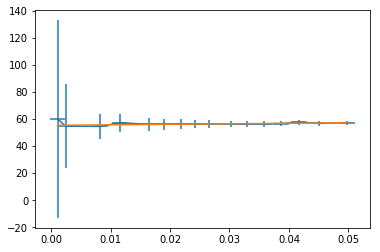

In [65]:
fs = f(volatom[:16], 27.06).astype(float)
fs_var = f_var(volatom[:16], 27.06, vol_var[:16], 0.01).astype(float)

Fs = F(fs, pressure[:16]).astype(float)
Fs_var = F_var(fs, pressure[:16], fs_var, pressure_var[:16]).astype(float)

fit = linearlizedF(fs, linear_params['beta']['K0']['value'], linear_params['beta']['K0p']['value'])

plt.errorbar(fs, Fs, xerr=np.sqrt(fs_var), yerr=np.sqrt(Fs_var))
plt.errorbar(fs, fit)

In [52]:
fs_var

array([1.53277328e-06, 1.54083401e-06, 1.57710226e-06, 1.59801012e-06,
       1.62922469e-06, 1.64173826e-06, 1.65995032e-06, 1.67570459e-06,
       1.69092944e-06, 1.71447063e-06, 1.73247140e-06, 1.75119214e-06,
       1.76977964e-06, 1.79024352e-06, 1.81255943e-06, 1.84372536e-06])

<ErrorbarContainer object of 3 artists>

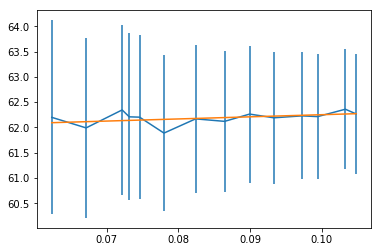

In [63]:
fs = f(volatom[28:42], 26.25).astype(float)
fs_var = f_var(volatom[28:42], 26.25, vol_var[28:42], 0.02).astype(float)

Fs = F(fs, pressure[28:42]).astype(float)
Fs_var = F_var(fs, pressure[28:42], fs_var, pressure_var[28:42]).astype(float)

fit = linearlizedF(fs, linear_params['bct']['K0']['value'], linear_params['bct']['K0p']['value'])

plt.errorbar(fs, Fs, yerr=np.sqrt(Fs_var))
plt.errorbar(fs, fit)


(55, 70)

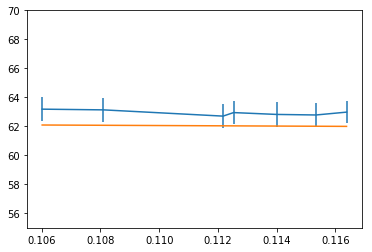

In [13]:
fs = f(volatom[42:], 26.2).astype(float)
fs_var = f_var(volatom[42:], 26.2, vol_var[42:], 0.01).astype(float)

Fs = F(fs, pressure[42:]).astype(float)
Fs_var = F_var(fs, pressure[42:], fs_var, pressure_var[42:]).astype(float)

fit = linearlizedF(fs, linear_params['bct']['K0']['value'], linear_params['bct']['K0p']['value'])

plt.errorbar(fs, Fs, yerr=np.sqrt(Fs_var))
plt.errorbar(fs, fit)
plt.ylim(55,70)

In [14]:
fs_var

array([2.42017432e-06, 2.43731524e-06, 2.49598493e-06, 2.47391301e-06,
       2.84765393e-06, 2.63433585e-06, 2.53184383e-06])

In [15]:
Fs_var

array([0.71975191, 0.69261181, 0.64362898, 0.6383363 , 0.70638502,
       0.63799053, 0.60563057])